In [1]:
from sklearn.ensemble import RandomTreesEmbedding

In [2]:
X = [[0,0], [1,0], [0,1], [-1,0], [0,-1]]
random_trees = RandomTreesEmbedding(
   n_estimators=5, random_state=0, max_depth=1)
random_trees.fit(X)
X_sparse_embedding = random_trees.transform(X)
X_sparse_embedding.toarray()

array([[0., 1., 1., 0., 1., 0., 0., 1., 1., 0.],
       [0., 1., 1., 0., 1., 0., 0., 1., 1., 0.],
       [0., 1., 0., 1., 0., 1., 0., 1., 0., 1.],
       [1., 0., 1., 0., 1., 0., 1., 0., 1., 0.],
       [0., 1., 1., 0., 1., 0., 0., 1., 1., 0.]])

In [3]:
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.datasets import make_circles
from sklearn.ensemble import RandomTreesEmbedding, ExtraTreesClassifier
from sklearn.decomposition import TruncatedSVD
from sklearn.naive_bayes import BernoulliNB
import lightgbm as lgb

C:\ProgramData\Anaconda3\lib\site-packages\dask\dataframe\utils.py:367: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  _numeric_index_types = (pd.Int64Index, pd.Float64Index, pd.UInt64Index)
C:\ProgramData\Anaconda3\lib\site-packages\dask\dataframe\utils.py:367: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  _numeric_index_types = (pd.Int64Index, pd.Float64Index, pd.UInt64Index)
C:\ProgramData\Anaconda3\lib\site-packages\dask\dataframe\utils.py:367: FutureWarning: pandas.UInt64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  _numeric_index_types = (pd.Int64Index, pd.Float64Index, pd.UInt64Index)


In [5]:
# make a synthetic dataset
X, y = make_circles(factor=0.5, random_state=0, noise=0.05)
 
# use RandomTreesEmbedding to transform data
hasher = RandomTreesEmbedding(n_estimators=10, random_state=0, max_depth=3)
X_transformed = hasher.fit_transform(X)
 

In [8]:
X.shape

(100, 2)

In [9]:
X_transformed

<100x74 sparse matrix of type '<class 'numpy.float64'>'
	with 1000 stored elements in Compressed Sparse Row format>

In [5]:
 # Visualize result using PCA
pca = TruncatedSVD(n_components=2)
X_reduced = pca.fit_transform(X_transformed)

In [17]:
# 在embedding之后的数据上使用伯努利贝叶斯
nb = BernoulliNB()
nb.fit(X, y)
print('embedding之前的分数是:',nb.score(X, y))

embedding之前的分数是: 0.51


In [40]:
# 在embedding之后的数据上使用伯努利贝叶斯
nb = BernoulliNB()
nb.fit(X_transformed, y)
print('embedding之前的分数是:',nb.score(X_transformed, y))

embedding之前的分数是: 1.0


In [47]:
# Learn an ExtraTreesClassifier for comparison
trees = lgb.LGBMClassifier(max_depth=4, n_estimators=100, random_state=0)
trees.fit(X, y)
print('embedding之前的分数是:',trees.score(X, y))

embedding之前的分数是: 0.94


In [42]:
# Learn an ExtraTreesClassifier for comparison
trees = lgb.LGBMClassifier(max_depth=3, n_estimators=10, random_state=0)
trees.fit(X_transformed, y)
print('embedding之后的分数是:',trees.score(X_transformed, y))

embedding之后的分数是: 0.97


In [37]:
# Plot the decision in original space. For that, we will assign a color to each
# point in the mesh [x_min, m_max] x [y_min, y_max].
h = .01
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

In [38]:
transformed_grid = hasher.transform(np.c_[xx.ravel(), yy.ravel()])

<ipython-input-49-3cdf9ea2c987>:19: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  ax.pcolormesh(xx, yy, y_grid_pred.reshape(xx.shape))
<ipython-input-49-3cdf9ea2c987>:30: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  ax.pcolormesh(xx, yy, y_grid_pred.reshape(xx.shape))


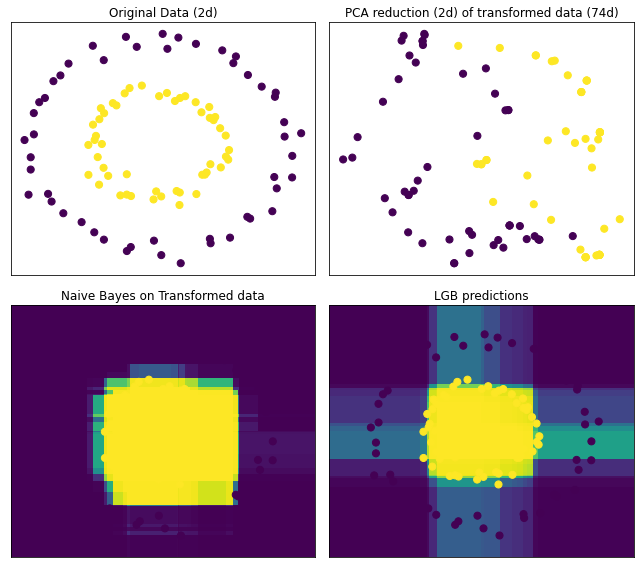

In [49]:
# scatter plot of original and reduced data
fig = plt.figure(figsize=(9, 8))
 
ax = plt.subplot(221)
ax.scatter(X[:, 0], X[:, 1], c=y, s=50)
ax.set_title("Original Data (2d)")
ax.set_xticks(())
ax.set_yticks(())
  
ax = plt.subplot(222)
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, s=50)
ax.set_title("PCA reduction (2d) of transformed data (%dd)" %
             X_transformed.shape[1])
ax.set_xticks(())
ax.set_yticks(())
y_grid_pred = nb.predict_proba(transformed_grid)[:, 1]
ax = plt.subplot(223)
ax.set_title("Naive Bayes on Transformed data")
ax.pcolormesh(xx, yy, y_grid_pred.reshape(xx.shape))
ax.scatter(X[:, 0], X[:, 1], c=y, s=50)
ax.set_ylim(-1.4, 1.4)
ax.set_xlim(-1.4, 1.4)
ax.set_xticks(())
ax.set_yticks(())
 
# transform grid using ExtraTreesClassifier
y_grid_pred = trees.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
ax = plt.subplot(224)
ax.set_title("LGB predictions")
ax.pcolormesh(xx, yy, y_grid_pred.reshape(xx.shape))
ax.scatter(X[:, 0], X[:, 1], c=y, s=50)
ax.set_ylim(-1.4, 1.4)
ax.set_xlim(-1.4, 1.4)
ax.set_xticks(())
ax.set_yticks(())
plt.tight_layout()
plt.show()

In [57]:
xx

array([[-1.51761242, -1.50761242, -1.49761242, ...,  1.55238758,
         1.56238758,  1.57238758],
       [-1.51761242, -1.50761242, -1.49761242, ...,  1.55238758,
         1.56238758,  1.57238758],
       [-1.51761242, -1.50761242, -1.49761242, ...,  1.55238758,
         1.56238758,  1.57238758],
       ...,
       [-1.51761242, -1.50761242, -1.49761242, ...,  1.55238758,
         1.56238758,  1.57238758],
       [-1.51761242, -1.50761242, -1.49761242, ...,  1.55238758,
         1.56238758,  1.57238758],
       [-1.51761242, -1.50761242, -1.49761242, ...,  1.55238758,
         1.56238758,  1.57238758]])

In [56]:
np.c_[xx.ravel(), yy.ravel()]

array([[-1.51761242, -1.65802566],
       [-1.50761242, -1.65802566],
       [-1.49761242, -1.65802566],
       ...,
       [ 1.55238758,  1.57197434],
       [ 1.56238758,  1.57197434],
       [ 1.57238758,  1.57197434]])

In [ ]:
# Learn a Naive Bayes classifier on the transformed data
nb = BernoulliNB()
nb.fit(X_transformed, y)
 
 
# Learn an ExtraTreesClassifier for comparison
trees = ExtraTreesClassifier(max_depth=3, n_estimators=10, random_state=0)
trees.fit(X, y)
 
 
# scatter plot of original and reduced data
fig = plt.figure(figsize=(9, 8))
ax = plt.subplot(221)
ax.scatter(X[:, 0], X[:, 1], c=y, s=50)
ax.set_title("Original Data (2d)")
ax.set_xticks(())
ax.set_yticks(())
 
ax = plt.subplot(222)
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, s=50)
ax.set_title("PCA reduction (2d) of transformed data (%dd)" %
             X_transformed.shape[1])
ax.set_xticks(())
ax.set_yticks(())
 
# Plot the decision in original space. For that, we will assign a color to each
# point in the mesh [x_min, m_max] x [y_min, y_max].
h = .01
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
 
# transform grid using RandomTreesEmbedding
transformed_grid = hasher.transform(np.c_[xx.ravel(), yy.ravel()])
y_grid_pred = nb.predict_proba(transformed_grid)[:, 1]
 
ax = plt.subplot(223)
ax.set_title("Naive Bayes on Transformed data")
ax.pcolormesh(xx, yy, y_grid_pred.reshape(xx.shape))
ax.scatter(X[:, 0], X[:, 1], c=y, s=50)
ax.set_ylim(-1.4, 1.4)
ax.set_xlim(-1.4, 1.4)
ax.set_xticks(())
ax.set_yticks(())
 
# transform grid using ExtraTreesClassifier
y_grid_pred = trees.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
 
ax = plt.subplot(224)
ax.set_title("ExtraTrees predictions")
ax.pcolormesh(xx, yy, y_grid_pred.reshape(xx.shape))
ax.scatter(X[:, 0], X[:, 1], c=y, s=50)
ax.set_ylim(-1.4, 1.4)
ax.set_xlim(-1.4, 1.4)
ax.set_xticks(())
ax.set_yticks(())
 
plt.tight_layout()
plt.show()